1- preprocessing 2- lstm 3- prediction +save model 4- user query

this notebook contain :

1- Data preprocessing

2- text preprocessing(nlp techniques )

3- svc classifier

4- Random forest

5- lstm

This step loads the Amazon review dataset into a DataFrame.
The dataset is in a text file where each line represents a review and its sentiment label, separated by a tab (\t).
Using pandas.read_csv with sep="\t", we read the data and store it in the variable df for further analysis.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data="/content/drive/MyDrive/amazon_alexa (1).tsv"

In [ ]:

import pandas as pd
df=pd.read_csv(data,sep="\t")


In [ ]:
print(df.head(2))

   rating       date         variation verified_reviews  feedback
0       5  31-Jul-18  Charcoal Fabric     Love my Echo!         1
1       5  31-Jul-18  Charcoal Fabric         Loved it!         1


In [ ]:
df["verified_reviews"].head(15)

,verified_reviews
0,Love my Echo!
1,Loved it!
2,"Sometimes while playing a game, you can answer..."
3,I have had a lot of fun with this thing. My 4 ...
4,Music
5,I received the echo as a gift. I needed anothe...
6,"Without having a cellphone, I cannot use many ..."
7,I think this is the 5th one I've purchased. I'...
8,looks great
9,Love it! I’ve listened to songs I haven’t hear...


# **Preprocessing the data**

In [ ]:
print(f"\n",df.info())
print(f"\n",df.isnull)
print(f"\n data size: ",df.size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB

 None

 <bound method DataFrame.isnull of       rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18    

In [ ]:
df.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')





---



---



"Since the dataset includes 'date' as one of its features, we will analyze and represent its effect."



**This code creates a bar chart showing how many reviews were made each day, based on the 'date' column.**



<ipython-input-8-8af9335162ad>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"])


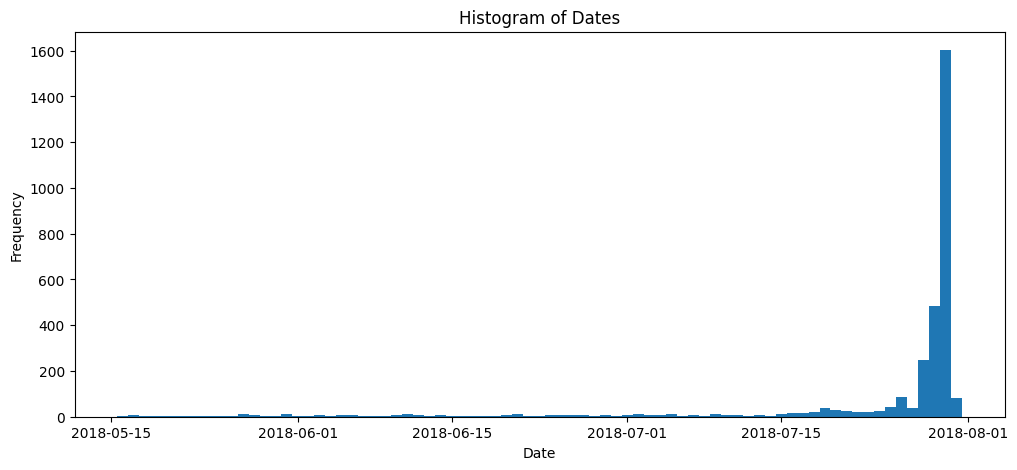

In [ ]:

import matplotlib.pyplot as plt
df["date"] = pd.to_datetime(df["date"])
date_counts = df["date"].value_counts().sort_index()
plt.figure(figsize=(12, 5))
plt.bar(date_counts.index, date_counts.values, width=1.0)
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.title("Histogram of Dates")
plt.show()


**This code plots a histogram to show the distribution of sentiment classes (0 = negative, 1 = positive) in the 'feedback' column.**


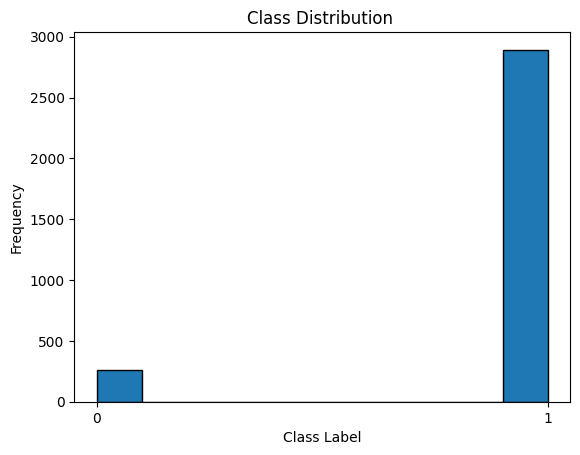

In [ ]:

plt.hist(df["feedback"], edgecolor='black')
plt.title('Class Distribution ')
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.xticks([0, 1])
plt.show()

In [ ]:
#تغيير مسمى فقط
df["reviews"]=df["verified_reviews"]

# **Preprocessing the text**
1-Handle missing data (pd.isna).

2-Check if the text contains only emojis.

3-Convert text to lowercase.

4-Remove special characters and numbers but keep emojis.

5-Tokenize the text.

6-Handle negation in the tokenized words.

7-Remove stopwords.

8-Lemmatize words.

9-Reconstruct text with emojis.

10-Detokenize the final tokens into a sentence.

11- lowercasing

12 - marks


In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.3 MB/s eta 0:00:00


In [ ]:
import nltk
import re
import spacy
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


2-Check if the text contains only emojis.


 In our dataset, we have three types of reviews:
 1. Text-only reviews (e.g., "I love this product.")
 2. Text with emojis (e.g., "This is amazing 😍")
 3. Emoji-only reviews (e.g., "😍😂👍")



In [ ]:
def is_emoji_only(text):
    return all(char in emoji.EMOJI_DATA for char in text.strip())



In [ ]:
import emoji
import pandas as pd

# Define a function to check if a review contains an emoji using the emoji library
def contains_emoji(text):
    if isinstance(text, str):  # Check if the text is a string
        return any(char in emoji.EMOJI_DATA for char in text)
    return False  # Return False if the text is not a string (like NaN or numeric)

# Filter the reviews containing emojis from the 'verified_reviews' column
df_with_emojis = df[df['verified_reviews'].apply(contains_emoji)]

# Display the reviews containing emojis
print("Reviews containing emojis:")
print(df_with_emojis[['verified_reviews']])



Reviews containing emojis:
                                       verified_reviews
49    No different than Apple. To play a specific li...
60                                                    😍
134                                  So far I like it 🤓
229   Best thing I've invested in in a while thank y...
447   Works perfect no wear and tear on the device I...
541   Well I’m a big fan of echoes these ones went I...
681   Seems to have trouble hearing me when I say th...
684   I bought this for a family member as a gift. I...
744   No different than Apple. To play a specific li...
755                                                   😍
829                                  So far I like it 🤓
924   Best thing I've invested in in a while thank y...
1101  It was a gift and the recipient love love love...
1160  This is our first step into a smart home. Soon...
1237  I am a small business owner with no staff. Wit...
1238  Bedroom clock , ask questions,  weather report...
1351  The echo spot i

**This function merges negation words with the word immediately following them to preserve the negative meaning**


In [ ]:
import nltk

nltk.download('stopwords')

def handle_negation(tokens):

    negation_words = {"not", "no", "never", "n't", "none", "nobody", "nothing", "neither", "nor"}

    new_tokens = []
    skip = False

    for i in range(len(tokens)):
        if skip:
            skip = False
            continue

        if tokens[i] in negation_words and i + 1 < len(tokens):
            new_tokens.append(tokens[i] + "_" + tokens[i + 1])
            skip = True
        else:
            new_tokens.append(tokens[i])

    return new_tokens


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


 **This function converts emojis in the text into their descriptive names using the 'emoji' library**


In [ ]:
import emoji

def emoji_to_text(text):
    return emoji.demojize(text)

#Example of conversion
text = " 😍😊"
converted_text = emoji_to_text(text)
print(converted_text)





 :smiling_face_with_heart-eyes::smiling_face_with_smiling_eyes:


In [ ]:
def preprocess_text(text):
  #Dealing with empty values
    if pd.isna(text):
        return ""
#If the text consists only of emojis, it returns it as is (after removing the spaces)
    if is_emoji_only(text):
        return text.strip()
### 11-preprocessing
    text = text.lower()

    text = re.sub(r"[^\w\s]", "", text)
    text = "".join([char for char in text if char.isalpha() or emoji.is_emoji(char) or char.isspace()])

    # ((Tokenization))
    tokens = word_tokenize(text)

    #  negation
    tokens = handle_negation(tokens)

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization

    text_without_emojis = " ".join([word for word in tokens if not emoji.is_emoji(word)])
    text_lemmatized = [token.lemma_ for token in nlp(text_without_emojis)]
    final_tokens = text_lemmatized + [word for word in tokens if emoji.is_emoji(word)]
    return TreebankWordDetokenizer().detokenize(final_tokens)


**This line applies both preprocessing and emoji-to-text conversion to each review in the 'reviews' column**


In [ ]:
df["reviews"] = df["reviews"].apply(lambda x: emoji_to_text(preprocess_text(x)))


In [ ]:
df["reviews"].head(15)

,reviews
0,love echo
1,love
2,sometimes play game answer question correctly ...
3,lot fun thing yr old learn dinosaur control li...
4,music
5,receive echo gift need another bluetooth somet...
6,without cellphone not_use many feature ipad no...
7,think th one I ve purchase I m work get one ev...
8,look great
9,love I ve listen song have not hear since chil...




---


# **⭕Handling Imbalance Classes:**


---




In [ ]:
pip install imblearn



---


# **Original Class Counts ▶**


---



In [ ]:
X = df["reviews"]
y = df["feedback"]



print("Original class counts:")
print(y.value_counts())

Original class counts:
feedback
1    2893
0     257
Name: count, dtype: int64




---


# Handle imbalance ▶ **OVER Sampling**

**This code balances the dataset using random oversampling by increasing the minority class to match the size of the majority class.**


---




In [ ]:
from imblearn.over_sampling import RandomOverSampler

X_O = df["reviews"]
y_O = df["feedback"]

# Oversampling to balance the class
Over_sampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = Over_sampler.fit_resample(X_O.values.reshape(-1, 1), y_O)

print("Balanced class counts (Over Sampling):")
print(y_resampled.value_counts())

Balanced class counts (Over Sampling):
feedback
1    2893
0    2893
Name: count, dtype: int64




---


# Handle imbalance ▶ **UNDER Sampling**

**This code balances the dataset using random undersampling by reducing the majority class to match the size of the minority class.**


---




In [ ]:
# Handle the imbalanced class with undersampling
from imblearn.under_sampling import RandomUnderSampler

X_U = df["reviews"]
y_U = df["feedback"]

# Apply undersampling to balance the class
Under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_underesampled, y_underesampled = Under_sampler.fit_resample(X_U.values.reshape(-1, 1), y_U)



print("Balanced class counts (Under Sampling):")

print(y_underesampled.value_counts())


Balanced class counts (Under Sampling):
feedback
0    257
1    257
Name: count, dtype: int64




---


# **⭕Splitting**


---



**splits the dataset into training and testing sets (85% train, 15% test)**


The 1 in the ouput means ▶ using one feature ( "reviews") for training.




# **⏬Splitting with Normal**

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df["reviews"], df["feedback"], test_size=0.15, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")




X_train shape: (2677,)
X_test shape: (473,)
y_train shape: (2677,)
y_test shape: (473,)


#**⏬Splitting with OverSampling**

In [ ]:
from sklearn.model_selection import train_test_split

X_Otrain, X_Otest, y_Otrain, y_Otest = train_test_split(X_resampled, y_resampled, test_size=0.15, random_state=42)

print(f"X_train shape: {X_Otrain.shape}")
print(f"X_test shape: {X_Otest.shape}")
print(f"y_train shape: {y_Otrain.shape}")
print(f"y_test shape: {y_Otest.shape}")

X_train shape: (4918, 1)
X_test shape: (868, 1)
y_train shape: (4918,)
y_test shape: (868,)


# **⏬Splitting with UnderSampling**

In [ ]:
X_Utrain, X_Utest, y_Utrain, y_Utest = train_test_split(X_underesampled, y_underesampled, test_size=0.15, random_state=42)

print(f"X_train shape: {X_Utrain.shape}")
print(f"X_test shape: {X_Utest.shape}")
print(f"y_train shape: {y_Utrain.shape}")
print(f"y_test shape: {y_Utest.shape}")

X_train shape: (436, 1)
X_test shape: (78, 1)
y_train shape: (436,)
y_test shape: (78,)






---



---

# **⭕Classification**



---



---



#Train SVC classifier (**Original**)


In [ ]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 3: Train the SVC model
svc_model = SVC(kernel='linear')  # Linear kernel is suitable for text data
svc_model.fit(X_train_tfidf, y_train)

# Step 4: Make predictions
y_pred = svc_model.predict(X_test_tfidf)



In [ ]:
# Step 5: Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9218
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.20      0.33        46
           1       0.92      1.00      0.96       427

    accuracy                           0.92       473
   macro avg       0.96      0.60      0.64       473
weighted avg       0.93      0.92      0.90       473



#Train SVC classifier (**Undersampling**)


In [ ]:

X_Utrain_flat = X_Utrain.ravel()
X_Utest_flat = X_Utest.ravel()

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_Utrain_flat)
X_test_tfidf = vectorizer.transform(X_Utest_flat)

# 4. Train SVM classifier

svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_Utrain)

# 5. Predict and evaluate
y_Upred = svm_model.predict(X_test_tfidf)

# Metrices

In [ ]:

accuracy_U = accuracy_score(y_Utest, y_Upred)
print(f"\n Accuracy: {accuracy_U:.4f}")

print("\nClassification Report:")
print(classification_report(y_Utest, y_Upred))


 Accuracy: 0.7821

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        46
           1       0.76      0.69      0.72        32

    accuracy                           0.78        78
   macro avg       0.78      0.77      0.77        78
weighted avg       0.78      0.78      0.78        78



#Train SVC classifier (**Oversampling**)


In [ ]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

# Flatten the arrays from 2D to 1D to make them compatible with TfidfVectorizer, which expects a list of strings
X_Otrain_flat = X_Otrain.ravel()
X_Otest_flat = X_Otest.ravel()

# Convert the text reviews into numerical feature vectors using TF-IDF to prepare them for machine learning
vectorizer = TfidfVectorizer(max_features=5000)
X_Otrain_tfidf = vectorizer.fit_transform(X_Otrain_flat)
X_Otest_tfidf = vectorizer.transform(X_Otest_flat)

# 4. Train SVM classifier

svm_model = SVC(kernel='linear')
svm_model.fit(X_Otrain_tfidf, y_Otrain)

# 5. Predict and evaluate
y_Opred = svm_model.predict(X_Otest_tfidf)




In [ ]:

from sklearn.metrics import accuracy_score, classification_report
accuracy_O = accuracy_score(y_Otest, y_Opred)
print(f"\n Accuracy: {accuracy_O:.4f}")

print("\nClassification R eport:")
print(classification_report(y_Otest, y_Opred))


 Accuracy: 0.9412

Classification R eport:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       406
           1       0.93      0.96      0.95       462

    accuracy                           0.94       868
   macro avg       0.94      0.94      0.94       868
weighted avg       0.94      0.94      0.94       868



# Metrices

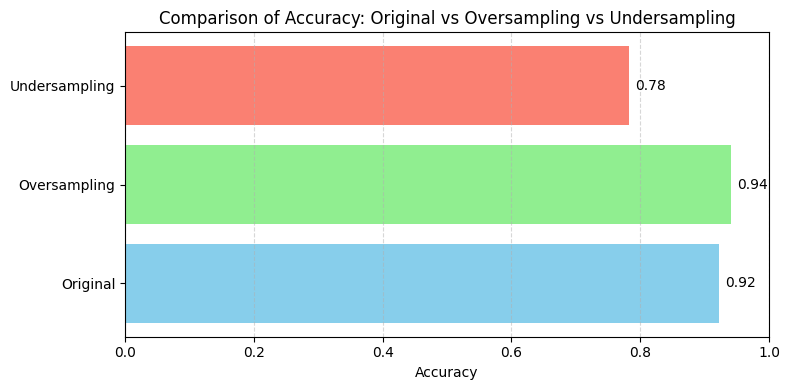

In [ ]:
import matplotlib.pyplot as plt

# Accuracy values
names = ['Original', 'Oversampling', 'Undersampling']
values = [accuracy, accuracy_O, accuracy_U]

# Plot
plt.figure(figsize=(8, 4))
bars = plt.barh(names, values, color=['skyblue', 'lightgreen', 'salmon'])

# Add value labels to bars
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.2f}", va='center')

plt.xlabel('Accuracy')
plt.title('Comparison of Accuracy: Original vs Oversampling vs Undersampling')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# **SVC Confusion Matrix (OverSampling)**







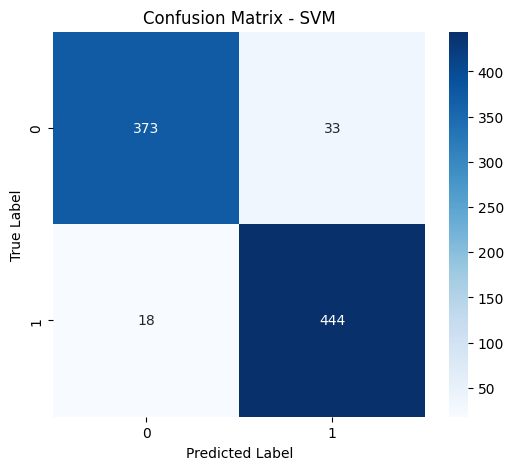

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_Otest, y_Opred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM")
plt.show()

# **SVC Confusion Matrix (original)**

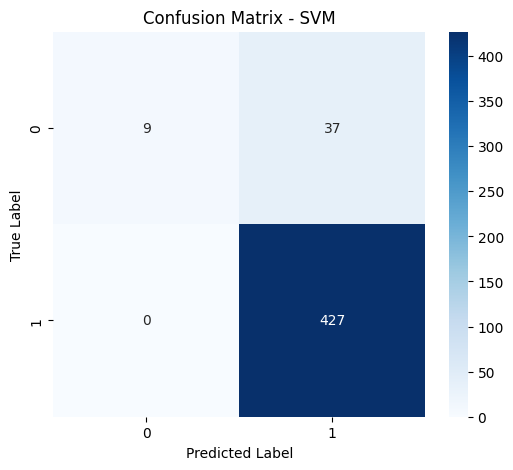

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM")
plt.show()


In [ ]:
import joblib
joblib.dump(vectorizer, "vectorizer.pkl")
joblib.dump(svm_model, "svm_model.pkl")


['svm_model.pkl']

# **RandomForest Classifier**(**Oversampling**)


In [ ]:
# RandomForest
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
#Convert text to features using TF-IDF + N-grams
X_Otrain_flat = X_Otrain.ravel()
X_Otest_flat = X_Otest.ravel()

# Convert text to features using TF-IDF + N-grams
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_Otrain_tfidf = vectorizer.fit_transform(X_Otrain_flat)
X_Otest_tfidf = vectorizer.transform(X_Otest_flat)



rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_Otrain_tfidf, y_Otrain)

y_Opred_rf = rf_model.predict(X_Otest_tfidf)

accuracy_rf_O = accuracy_score(y_Otest, y_Opred_rf)
print(f"Random Forest Accuracy: {accuracy_rf_O}")

print("Classification Report:")
print(classification_report(y_Otest, y_Opred_rf))

Random Forest Accuracy: 0.9769585253456221
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       406
           1       1.00      0.96      0.98       462

    accuracy                           0.98       868
   macro avg       0.98      0.98      0.98       868
weighted avg       0.98      0.98      0.98       868



# **RandomForest Classifier**(**Original**)


In [ ]:
# RandomForest
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
#Convert text to features using TF-IDF + N-grams
vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

y_pred_rf = rf_model.predict(X_test_tfidf)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9386892177589852
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.39      0.55        46
           1       0.94      1.00      0.97       427

    accuracy                           0.94       473
   macro avg       0.94      0.69      0.76       473
weighted avg       0.94      0.94      0.93       473



**Comparison of Accuracy**

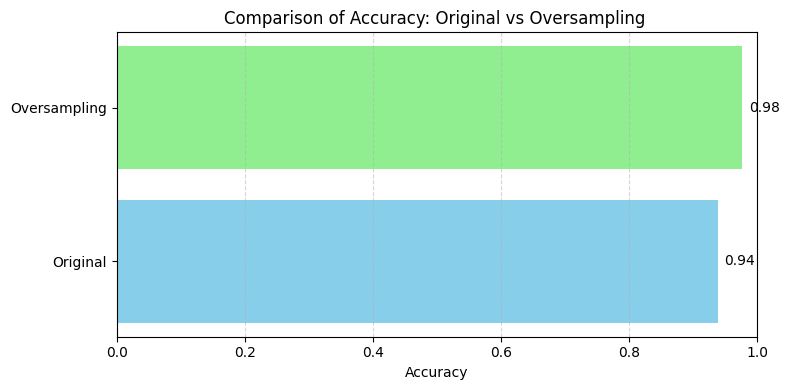

In [ ]:
names = ['Original', 'Oversampling']
values = [accuracy_rf, accuracy_rf_O]

# Plot
plt.figure(figsize=(8, 4))
bars = plt.barh(names, values, color=['skyblue', 'lightgreen'])

# Add value labels to bars
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.2f}", va='center')

plt.xlabel('Accuracy')
plt.title('Comparison of Accuracy: Original vs Oversampling ')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Confusion Matrix - Random Forest(**Original**)

---



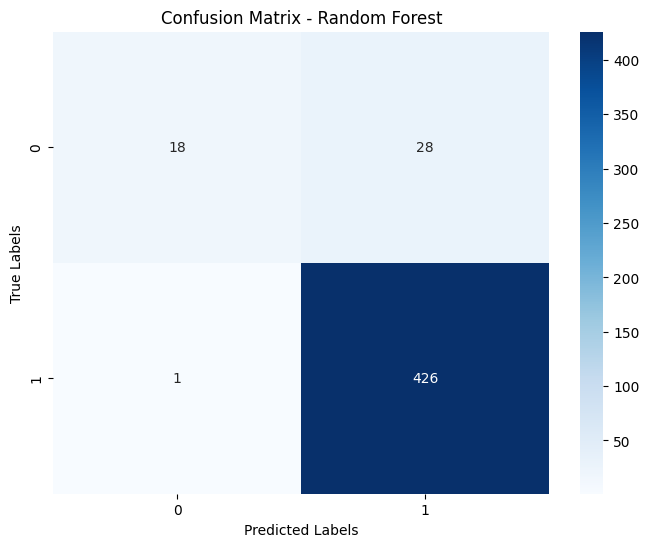

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()




Confusion Matrix - Random Forest(**Oversampling**)


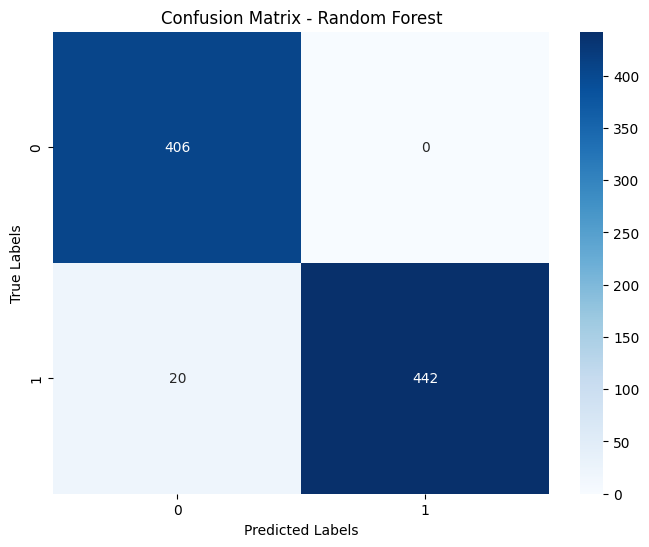

In [ ]:
cm = confusion_matrix(y_Otest, y_Opred_rf)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [ ]:
import joblib
joblib.dump(rf_model, "rf_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")


['vectorizer.pkl']

# **LSTM**


In [ ]:
pip install tensorflow

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Flatten the text arrays to 1D if needed
X_Otrain_flat = X_Otrain.ravel()
X_Otest_flat = X_Otest.ravel()

# Step 1: Tokenize the text
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_Otrain_flat)

# Step 2: Convert texts to sequences
train_sequences = tokenizer.texts_to_sequences(X_Otrain_flat)
test_sequences = tokenizer.texts_to_sequences(X_Otest_flat)

# Step 3: Pad sequences
max_len = max(len(seq) for seq in train_sequences)  # or a fixed number like 100
X_train_pad = pad_sequences(train_sequences, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(test_sequences, maxlen=max_len, padding='post', truncating='post')

# Final shapes
print(f"X_train shape: {X_train_pad.shape}")
print(f"X_test shape: {X_test_pad.shape}")
print(f"y_train shape: {y_Otrain.shape}")
print(f"y_test shape: {y_Otest.shape}")


X_train shape: (4918, 260)
X_test shape: (868, 260)
y_train shape: (4918,)
y_test shape: (868,)


In [ ]:
import tensorflow as tf
from tensorflow import keras

# model initialization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional,Dropout
vocab_size = 5000
embedding_dim = 64

model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_len),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(24, activation='relu'),
    Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')

])
# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
num_epochs = 5
history = model.fit(X_train_pad, y_Otrain,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=0.1)
model.summary()


Epoch 1/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 74s 447ms/step - accuracy: 0.6559 - loss: 0.6291 - val_accuracy: 0.8150 - val_loss: 0.3921
Epoch 2/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 63s 313ms/step - accuracy: 0.8838 - loss: 0.2802 - val_accuracy: 0.9553 - val_loss: 0.1211
Epoch 3/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 79s 294ms/step - accuracy: 0.9754 - loss: 0.0879 - val_accuracy: 0.9695 - val_loss: 0.0865
Epoch 4/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 81s 286ms/step - accuracy: 0.9799 - loss: 0.0628 - val_accuracy: 0.9736 - val_loss: 0.0802
Epoch 5/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 41s 286ms/step - accuracy: 0.9881 - loss: 0.0406 - val_accuracy: 0.9736 - val_loss: 0.0894


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 260, 64)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 24)             │         3,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,167,509 (4.45 MB)

 Trainable params: 389,169 (1.48 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 778,340 (2.97 MB)

shows accuracy and loss on both training and validation sets

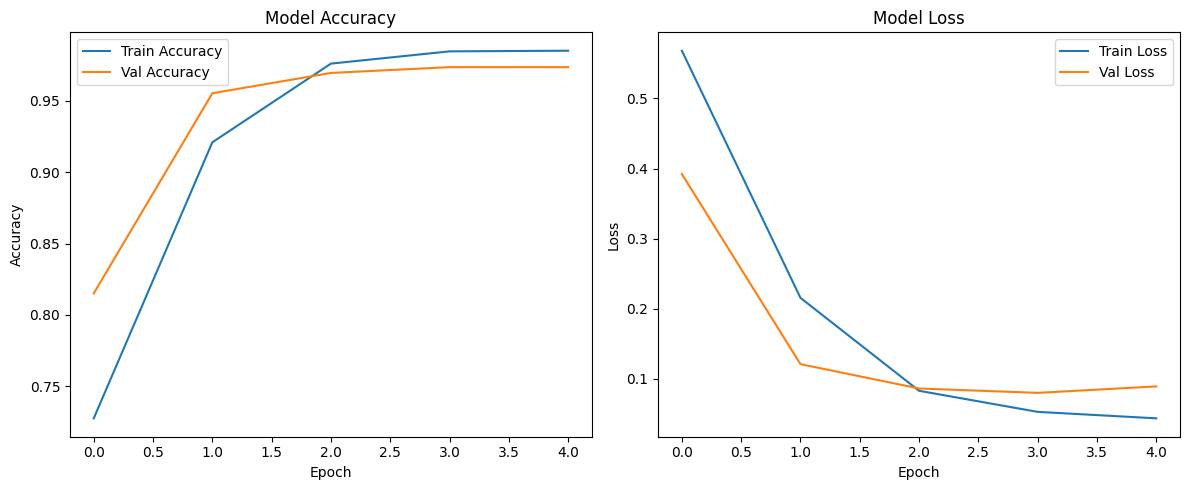

In [ ]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import joblib
joblib.dump(tokenizer, "tokenizer.pkl")
joblib.dump(max_len, "max_length.pkl")


['max_length.pkl']

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Predict probabilities
y_pred_prob = model.predict(X_test_pad)

# Convert probabilities to binary labels (0 or 1)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Print model accuracy
accuracy = accuracy_score(y_Otest, y_pred)
print(f"LSTM Model Accuracy: {accuracy}")

# Get the actual classes present
unique_classes = np.unique(y_Otest)
target_names = [str(cls) for cls in unique_classes]

# Print classification report
print("Classification Report:")
print(classification_report(y_Otest, y_pred, target_names=target_names))


28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step
LSTM Model Accuracy: 0.9711981566820277
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       406
           1       1.00      0.95      0.97       462

    accuracy                           0.97       868
   macro avg       0.97      0.97      0.97       868
weighted avg       0.97      0.97      0.97       868



**Confusion Matrix - LSTM**

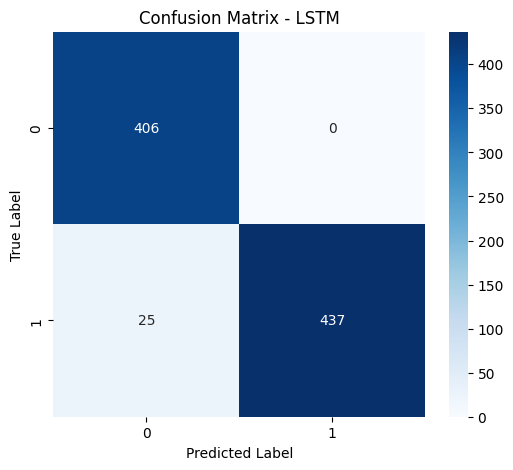

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_Otest, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - LSTM")
plt.show()


In [ ]:
model.save("LSTM_meaad.h5")

**user query**

In [ ]:
from tensorflow.keras.models import load_model
# Load the trained LSTM model
model = load_model("LSTM_meaad.h5")

# Load the tokenizer
tokenizer = joblib.load("tokenizer.pkl")

# Set max_len to the same value used during training
max_len = 260  # change if needed

# List of test examples (positive + negative)
test_texts = [
    "I really love this product 😍",      # Expected Positive
    "I do not recommend this at all 😡"  # Expected Negative
]

# Loop through each text and make prediction
for text in test_texts:
    clean_text = emoji.demojize(text.lower().strip())
    seq = tokenizer.texts_to_sequences([clean_text])
    pad = pad_sequences(seq, maxlen=max_len, padding='post', truncating='post')

    prediction = model.predict(pad)[0][0]

    sentiment = "Positive" if prediction >= 0.5 else "Negative"
    print(f"Text: {text}")
    print(f"Predicted sentiment by LSTM model: {sentiment} ({prediction:.2f})\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
Text: I really love this product 😍
Predicted sentiment by LSTM model: Positive (1.00)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Text: I do not recommend this at all 😡
Predicted sentiment by LSTM model: Negative (0.00)



In [ ]:
import joblib
import emoji

rf_model = joblib.load("rf_model.pkl")
vectorizer = joblib.load("vectorizer.pkl")


new_text = "I really love this product 😍"


clean_text = emoji.demojize(new_text.lower().strip())


new_vector = vectorizer.transform([clean_text])


prediction = rf_model.predict_proba(new_vector)[0][1]

if prediction >= 0.5:
    print(f"Predicted sentiment: Positive  ({prediction:.2f})")
else:
    print(f"Predicted sentiment: Negative  ({prediction:.2f})")


Predicted sentiment: Positive  (1.00)


# interface

In [ ]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.3 MB/s eta 0:00:00


In [ ]:
import gradio as gr
import tensorflow as tf
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences

# تحميل النموذج والبيانات
model = tf.keras.models.load_model("LSTM_meaad.h5")
tokenizer = pickle.load(open("tokenizer.pkl", "rb"))
max_length = pickle.load(open("max_length.pkl", "rb"))

# دالة التوقع مع تنسيق متقدم
def predict_sentiment(text):
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=max_length, padding='post')
    pred = model.predict(padded)[0][0]

    if pred > 0.5:
        label = "Positive"
        color = "#e0fce0"
        border = "#28a745"
        emoji = "https://cdn-icons-png.flaticon.com/512/742/742751.png"  # emoji سعيد
    else:
        label = "Negative"
        color = "#ffe0e0"
        border = "#dc3545"
        emoji = "https://cdn-icons-png.flaticon.com/512/742/742774.png"  # emoji زعلان

    html_output = f"""
    <div style='background-color:{color}; padding:20px; border-radius:15px; border:2px solid {border};
                box-shadow: 2px 2px 10px rgba(0,0,0,0.1); font-family:"Poppins", sans-serif'>
        <div style='display:flex; align-items:center; gap:15px;'>
            <img src="{emoji}" width="50"/>
            <div>
                <h3 style='margin:0;'>{label} Sentiment</h3>
                <p style='margin:0;'>Confidence: {pred:.2f}</p>
            </div>
        </div>
    </div>
    """
    return html_output

# واجهة Gradio
interface = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(label="📝 Write your review here:"),
    outputs=gr.HTML(label="🎯 Sentiment Result"),
    title="📊 Sentiment Classifier",
    description="This model predicts whether your text expresses a positive or negative sentiment.",
    theme="default"
)

interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://67b5b4348f98d09dd7.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
